In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('Housing.csv')

print(f"\n1. DATASET OVERVIEW")
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

# Display basic information about the dataset
print(f"\nDataset Info:")
print(df.info())

print(f"\nFirst 5 rows:")
print(df.head())

print(f"\nBasic Statistics:")
print(df.describe())

# Check for missing values
print(f"\nMissing values:")
print(df.isnull().sum())

# Check data types and unique values for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"\nCategorical columns: {list(categorical_cols)}")

for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")



1. DATASET OVERVIEW
Dataset shape: (545, 13)
Columns: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furn

In [5]:
# Create a copy of the original dataset
df_processed = df.copy()

# Encode categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    label_encoders[col] = le
    print(f"Encoded {col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

print(f"\nProcessed dataset shape: {df_processed.shape}")
print(f"Processed dataset columns: {list(df_processed.columns)}")

# Check correlation matrix
print(f"\nCorrelation with price (target variable):")
correlations = df_processed.corr()['price'].sort_values(ascending=False)
print(correlations)

Encoded mainroad: {'no': np.int64(0), 'yes': np.int64(1)}
Encoded guestroom: {'no': np.int64(0), 'yes': np.int64(1)}
Encoded basement: {'no': np.int64(0), 'yes': np.int64(1)}
Encoded hotwaterheating: {'no': np.int64(0), 'yes': np.int64(1)}
Encoded airconditioning: {'no': np.int64(0), 'yes': np.int64(1)}
Encoded prefarea: {'no': np.int64(0), 'yes': np.int64(1)}
Encoded furnishingstatus: {'furnished': np.int64(0), 'semi-furnished': np.int64(1), 'unfurnished': np.int64(2)}

Processed dataset shape: (545, 13)
Processed dataset columns: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']

Correlation with price (target variable):
price               1.000000
area                0.535997
bathrooms           0.517545
airconditioning     0.452954
stories             0.420712
parking             0.384394
bedrooms            0.366494
prefarea            0.329777
mainroad       

In [3]:
plt.style.use('default')
sns.set_palette("husl")

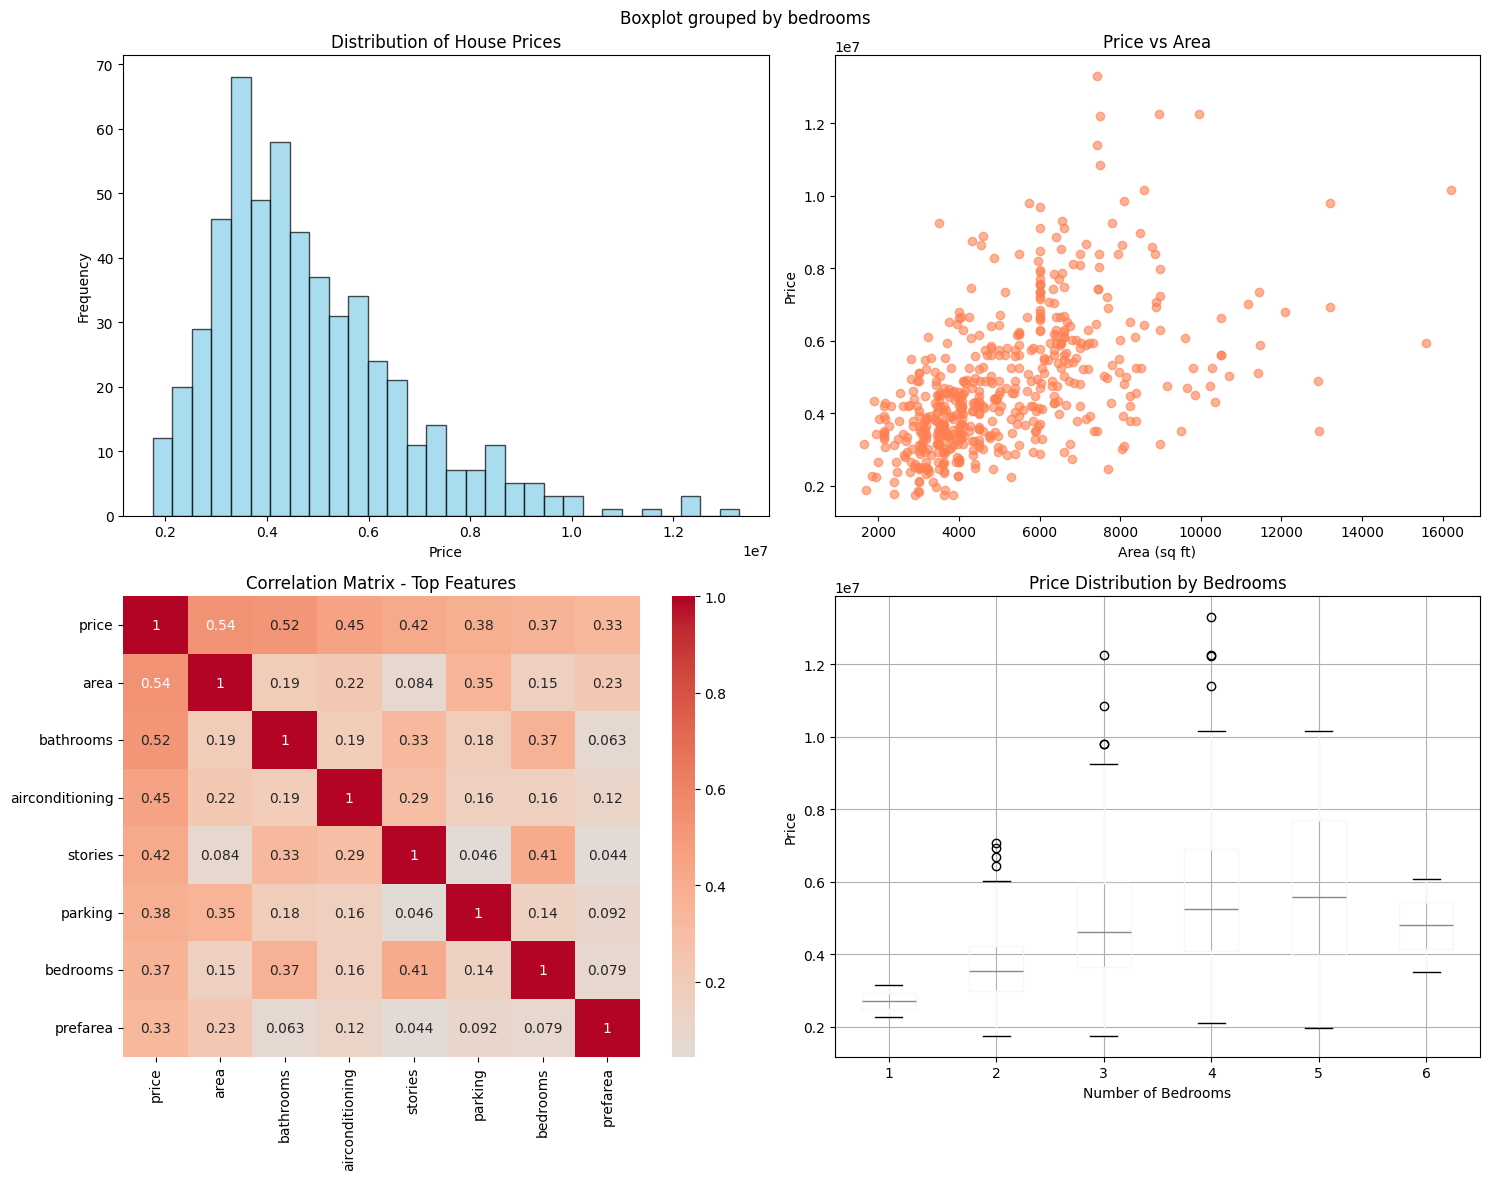

In [6]:
# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Price distribution
axes[0,0].hist(df['price'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Distribution of House Prices')
axes[0,0].set_xlabel('Price')
axes[0,0].set_ylabel('Frequency')

# Price vs Area scatter plot
axes[0,1].scatter(df['area'], df['price'], alpha=0.6, color='coral')
axes[0,1].set_title('Price vs Area')
axes[0,1].set_xlabel('Area (sq ft)')
axes[0,1].set_ylabel('Price')

# Correlation heatmap (top features)
top_features = correlations.abs().sort_values(ascending=False)[:8].index
corr_matrix = df_processed[top_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[1,0])
axes[1,0].set_title('Correlation Matrix - Top Features')

# Price by number of bedrooms
df.boxplot(column='price', by='bedrooms', ax=axes[1,1])
axes[1,1].set_title('Price Distribution by Bedrooms')
axes[1,1].set_xlabel('Number of Bedrooms')
axes[1,1].set_ylabel('Price')

plt.tight_layout()
plt.show()

In [7]:
# Define features (X) and target variable (y)
X = df_processed.drop('price', axis=1)
y = df_processed['price']

print(f"Features: {list(X.columns)}")
print(f"Target: price")
print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTrain set shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Test set shape: X_test: {X_test.shape}, y_test: {y_test.shape}")


Features: ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']
Target: price
Feature matrix shape: (545, 12)
Target vector shape: (545,)

Train set shape: X_train: (436, 12), y_train: (436,)
Test set shape: X_test: (109, 12), y_test: (109,)


In [8]:
# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

print(f"Model trained successfully!")
print(f"Intercept: {model.intercept_:,.2f}")

# Display feature coefficients
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print(f"\nFeature Coefficients (sorted by absolute value):")
print(feature_importance)


Model trained successfully!
Intercept: 293,083.07

Feature Coefficients (sorted by absolute value):
             Feature   Coefficient
2          bathrooms  1.097117e+06
8    airconditioning  7.855506e+05
7    hotwaterheating  6.878813e+05
10          prefarea  6.299017e+05
3            stories  4.062232e+05
6           basement  3.931598e+05
4           mainroad  3.668242e+05
5          guestroom  2.331468e+05
9            parking  2.257565e+05
11  furnishingstatus -2.103971e+05
1           bedrooms  7.857449e+04
0               area  2.358488e+02


In [9]:
# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate evaluation metrics
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)


In [10]:
print(f"TRAINING SET METRICS:")
print(f"  Mean Absolute Error (MAE): {train_mae:,.2f}")
print(f"  Mean Squared Error (MSE): {train_mse:,.2f}")
print(f"  Root Mean Squared Error (RMSE): {train_rmse:,.2f}")
print(f"  R-squared (R²): {train_r2:.4f}")

print(f"\nTEST SET METRICS:")
print(f"  Mean Absolute Error (MAE): {test_mae:,.2f}")
print(f"  Mean Squared Error (MSE): {test_mse:,.2f}")
print(f"  Root Mean Squared Error (RMSE): {test_rmse:,.2f}")
print(f"  R-squared (R²): {test_r2:.4f}")

TRAINING SET METRICS:
  Mean Absolute Error (MAE): 718,146.60
  Mean Squared Error (MSE): 969,902,818,698.31
  Root Mean Squared Error (RMSE): 984,836.44
  R-squared (R²): 0.6854

TEST SET METRICS:
  Mean Absolute Error (MAE): 979,679.69
  Mean Squared Error (MSE): 1,771,751,116,594.04
  Root Mean Squared Error (RMSE): 1,331,071.42
  R-squared (R²): 0.6495


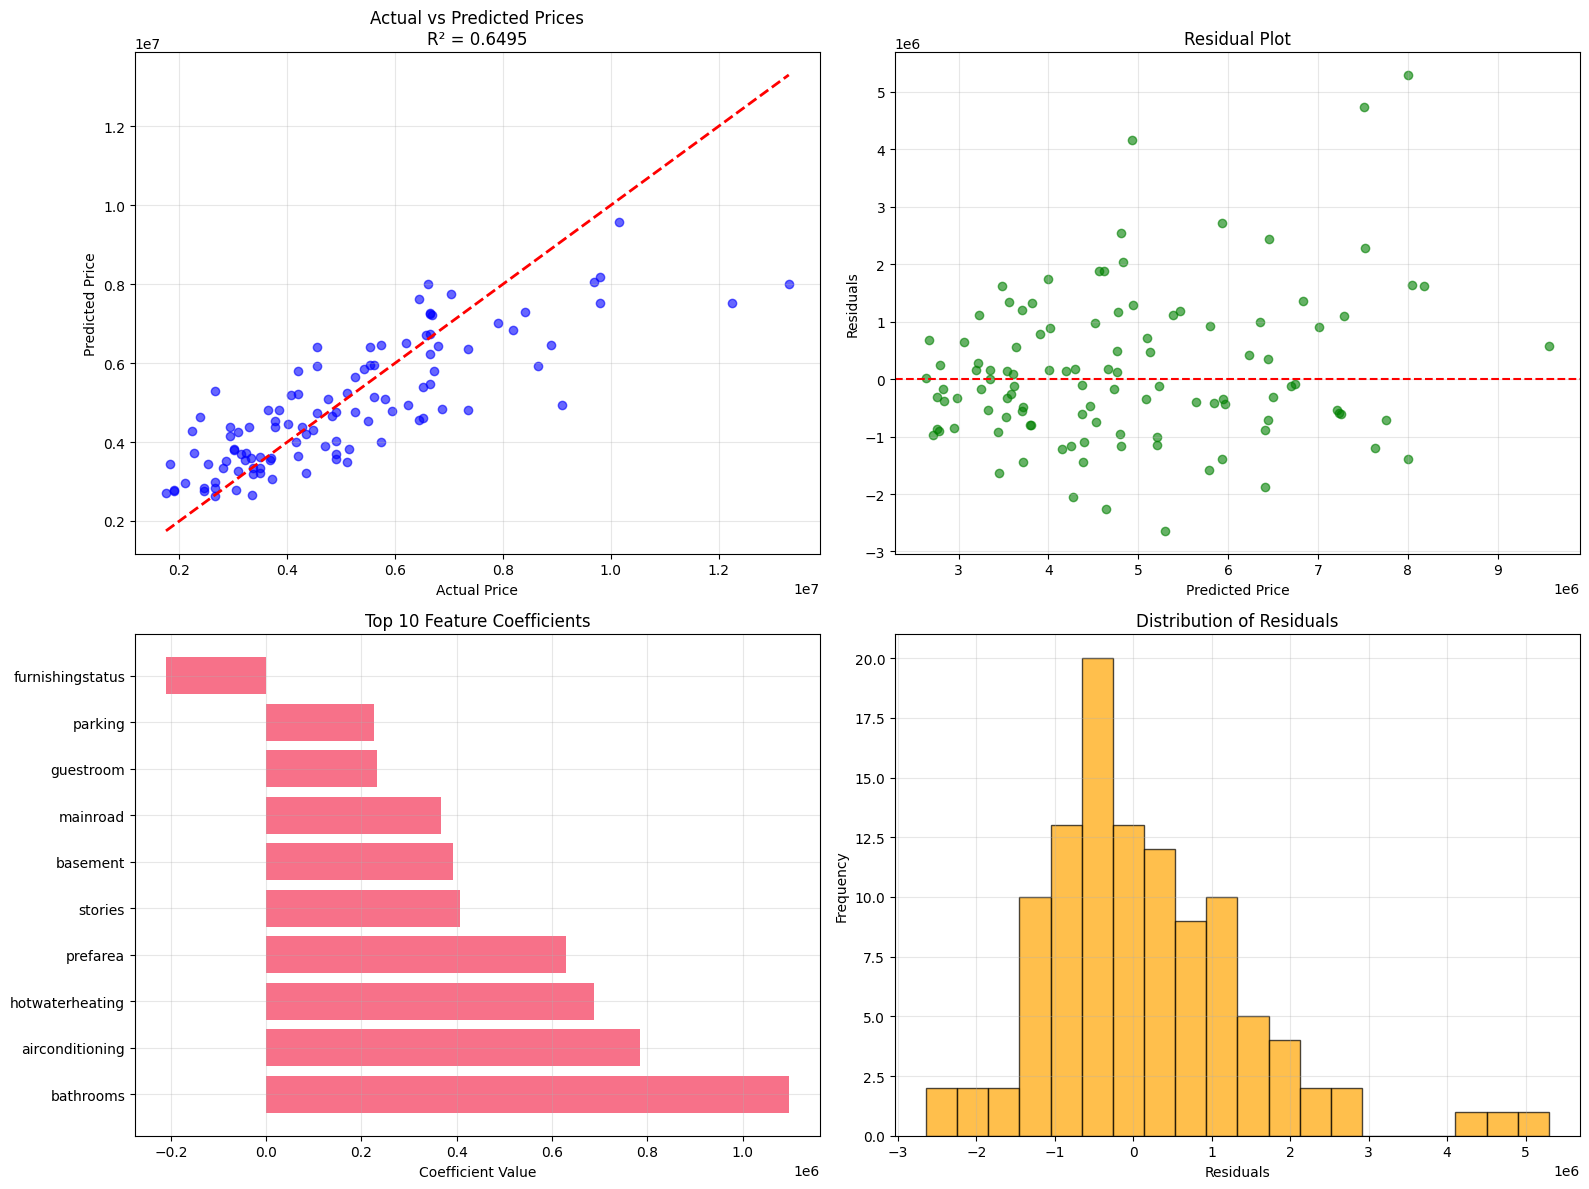

In [11]:
# Create comprehensive visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Actual vs Predicted scatter plot
axes[0,0].scatter(y_test, y_test_pred, alpha=0.6, color='blue')
axes[0,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0,0].set_xlabel('Actual Price')
axes[0,0].set_ylabel('Predicted Price')
axes[0,0].set_title(f'Actual vs Predicted Prices\nR² = {test_r2:.4f}')
axes[0,0].grid(True, alpha=0.3)

# 2. Residual plot
residuals = y_test - y_test_pred
axes[0,1].scatter(y_test_pred, residuals, alpha=0.6, color='green')
axes[0,1].axhline(y=0, color='r', linestyle='--')
axes[0,1].set_xlabel('Predicted Price')
axes[0,1].set_ylabel('Residuals')
axes[0,1].set_title('Residual Plot')
axes[0,1].grid(True, alpha=0.3)

# 3. Feature importance (coefficients)
top_10_features = feature_importance.head(10)
axes[1,0].barh(top_10_features['Feature'], top_10_features['Coefficient'])
axes[1,0].set_xlabel('Coefficient Value')
axes[1,0].set_title('Top 10 Feature Coefficients')
axes[1,0].grid(True, alpha=0.3)

# 4. Regression line for most important feature
most_important_feature = feature_importance.iloc[0]['Feature']
if most_important_feature in ['area']:  # For continuous variables
    axes[1,1].scatter(X_test[most_important_feature], y_test, alpha=0.6, label='Actual', color='blue')
    axes[1,1].scatter(X_test[most_important_feature], y_test_pred, alpha=0.6, label='Predicted', color='red')
    axes[1,1].set_xlabel(f'{most_important_feature}')
    axes[1,1].set_ylabel('Price')
    axes[1,1].set_title(f'Price vs {most_important_feature}')
    axes[1,1].legend()
    axes[1,1].grid(True, alpha=0.3)
else:
    # For categorical variables, show a different plot
    axes[1,1].hist(residuals, bins=20, alpha=0.7, color='orange', edgecolor='black')
    axes[1,1].set_xlabel('Residuals')
    axes[1,1].set_ylabel('Frequency')
    axes[1,1].set_title('Distribution of Residuals')
    axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [12]:
print(f"\n8. COEFFICIENT INTERPRETATION")
print("="*50)

print(f"Model Equation:")
equation = f"Price = {model.intercept_:,.2f}"
for feature, coef in zip(X.columns, model.coef_):
    sign = "+" if coef >= 0 else "-"
    equation += f" {sign} {abs(coef):,.2f}*{feature}"
print(equation[:200] + "..." if len(equation) > 200 else equation)

print(f"\nTop 5 Most Important Features:")
for i, row in feature_importance.head().iterrows():
    feature_name = row['Feature']
    coef_value = row['Coefficient']

    # Try to get original feature interpretation
    interpretation = ""
    if feature_name == 'area':
        interpretation = f"Each additional sq ft increases price by ${coef_value:,.2f}"
    elif feature_name in ['bedrooms', 'bathrooms', 'stories', 'parking']:
        interpretation = f"Each additional {feature_name[:-1]} increases price by ${coef_value:,.2f}"
    else:
        # For encoded categorical variables
        if feature_name in label_encoders:
            interpretation = f"Encoded variable - see encoding above for meaning"
        else:
            interpretation = f"Each unit increase changes price by ${coef_value:,.2f}"

    print(f"  {feature_name}: {coef_value:,.2f} - {interpretation}")


8. COEFFICIENT INTERPRETATION
Model Equation:
Price = 293,083.07 + 235.85*area + 78,574.49*bedrooms + 1,097,117.27*bathrooms + 406,223.16*stories + 366,824.19*mainroad + 233,146.77*guestroom + 393,159.78*basement + 687,881.31*hotwaterheating + 78...

Top 5 Most Important Features:
  bathrooms: 1,097,117.27 - Each additional bathroom increases price by $1,097,117.27
  airconditioning: 785,550.58 - Encoded variable - see encoding above for meaning
  hotwaterheating: 687,881.31 - Encoded variable - see encoding above for meaning
  prefarea: 629,901.66 - Encoded variable - see encoding above for meaning
  stories: 406,223.16 - Each additional storie increases price by $406,223.16


In [13]:

print(f"📊 Model Performance:")
print(f"  • R-squared (R²): {test_r2:.4f} ({test_r2*100:.2f}% of variance explained)")
print(f"  • Mean Absolute Error: ${test_mae:,.2f}")
print(f"  • Root Mean Squared Error: ${test_rmse:,.2f}")

performance_interpretation = ""
if test_r2 > 0.8:
    performance_interpretation = "Excellent model performance"
elif test_r2 > 0.6:
    performance_interpretation = "Good model performance"
elif test_r2 > 0.4:
    performance_interpretation = "Moderate model performance"
else:
    performance_interpretation = "Poor model performance - consider feature engineering"

print(f"  • Interpretation: {performance_interpretation}")

print(f"\n🔍 Key Insights:")
print(f"  • Most influential feature: {feature_importance.iloc[0]['Feature']}")
print(f"  • Average prediction error: ${test_mae:,.2f}")
print(f"  • Model explains {test_r2*100:.1f}% of price variation")

📊 Model Performance:
  • R-squared (R²): 0.6495 (64.95% of variance explained)
  • Mean Absolute Error: $979,679.69
  • Root Mean Squared Error: $1,331,071.42
  • Interpretation: Good model performance

🔍 Key Insights:
  • Most influential feature: bathrooms
  • Average prediction error: $979,679.69
  • Model explains 64.9% of price variation
